<a href="https://colab.research.google.com/github/choeuneheol/honrongmachine/blob/main/PART07_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###[Step 1-4] 데이터 준비

In [29]:
#csv 파일을 데이터 프레임으로 변환
df = pd.read_csv('./auto_mpg.csv', header=None)

# 열 이름 지정
df. columns = ['mpg','cylinders','displacement','horsepower','weight',
               'acceleration','model year','origin','name']

# horsepower 열의 자료형 변경 (문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True)   # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'],axis=0,inplace=True)  # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')   # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg','cylinders','horsepower','weight']]

# ndf 데이터를 train data와 test data로 구분(7:3 비율)
x=ndf[['weight']]     # 독립 변수 x
y=ndf['mpg']        # 종속 변수 y

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3,random_state=10)

print('훈련 데이터:',x_train.shape)
print('검증 데이터:',x_test.shape)

훈련 데이터: (274, 1)
검증 데이터: (118, 1)


###[Step 5] 비선형회귀분석 모형 - sklearn 사용

In [30]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression       # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures    # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)             # 2차항 적용
x_train_poly = poly.fit_transform(x_train)      # x_train 데이터를 2차항으로 변형

print('원 데이터:', x_train.shape)
print('2차항 변환 데이터:',x_train_poly.shape)

원 데이터: (274, 1)
2차항 변환 데이터: (274, 3)


In [31]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

#학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
x_test_poly = poly.fit_transform(x_test)     # x_test 데이터를 2차항으로 변형
r_square = pr.score(x_test_poly,y_test)
print(r_square)

0.7087009262975481


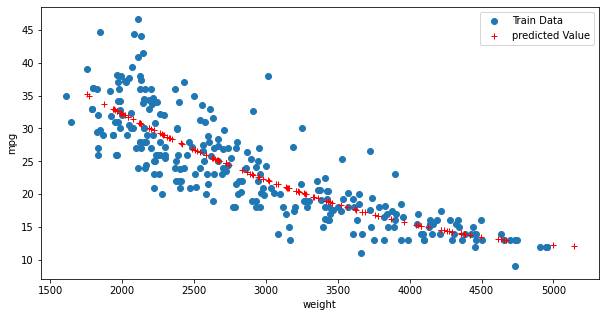

In [32]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(x_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train, y_train,'o', label='Train Data')           # 데이터 분포
ax.plot(x_test, y_hat_test, 'r+', label='predicted Value')  # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

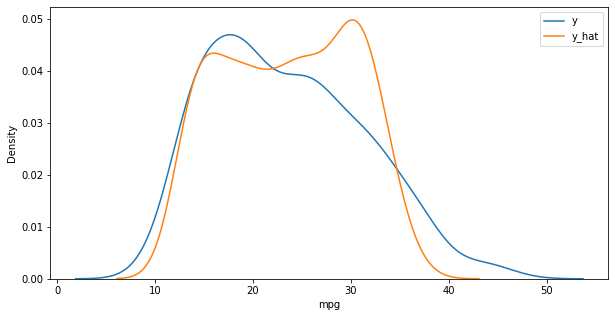

In [33]:
# 모형에 전체 x 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
x_ploy = poly.fit_transform(x)
y_hat = pr.predict(x_ploy)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()